In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set visualization style
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Display basic information
print('Dataset Info:')
print(df.info())
print('\nMissing Values:')
print(df.isnull().sum())

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop('Cabin', axis=1, inplace=True)

# Encode categorical features
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

# Drop non-numeric columns not needed
df.drop(['Name', 'Ticket', 'PassengerId', 'Survived'], axis=1, inplace=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Remove outliers using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Save cleaned dataset
df.to_csv('Titanic-Cleaned-Dataset.csv', index=False)
print('\nCleaned Dataset Info:')
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687

Summary Statistics:
           Pclass         Sex         Age       SibSp         Parch  \
count  561.000000  561.000000  561.000000  561.000000  5.610000e+02   
mean     2.520499    0.752228   -0.014637   -0.301488 -4.736736e-01   
std      0.717155    0.432104    0.650385    0.399553  4.444855e-16   
min      1.000000    0.000000   -1.872184   -0.474545 -4.736736e-01   
25%      2.000000    1.000000   -0.412037   -0.474545 -4.736736e-01   
50%      3.000000    1.000000   -0.104637   -0.474545 -4.736736e-01   
75%      3.000000    1.000000    0.202762   -0.474545 -4.736736e-01   
max      3.000000    1.000000    1.893459    1.340132 -4.736736e-01   

             Fare  
count  561.000000  
mean    -0.372014  
std      0.212633  
min     -0.648422  
25%     -0.491874  
50%     -0.478116  
75%     -0.345395  
max      0.420730  


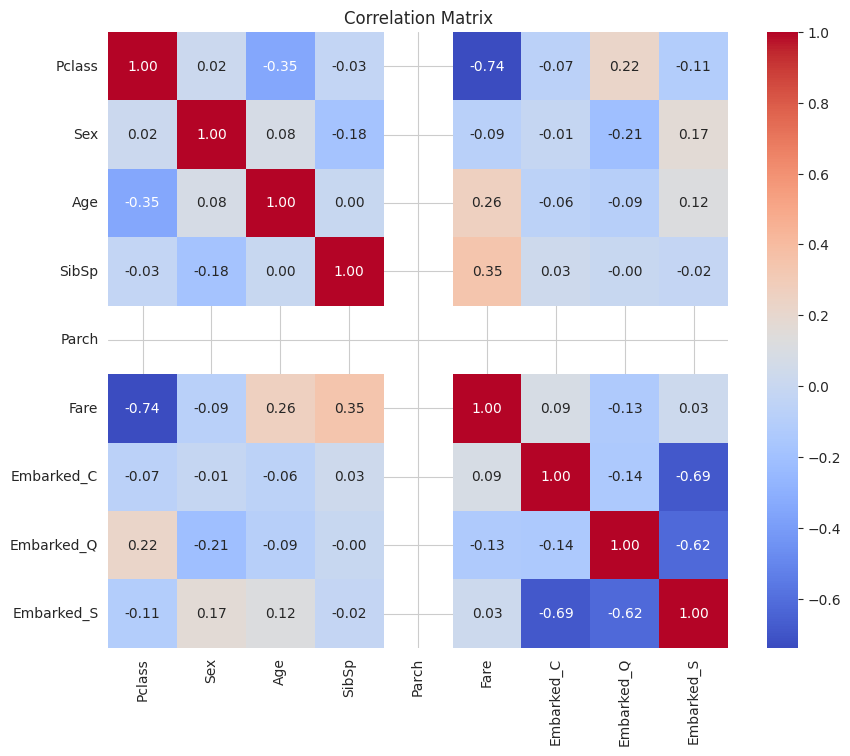

In [3]:
# Summary statistics
print('Summary Statistics:')
print(df.describe())

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

Simple Linear Regression Metrics:
MAE: 0.0885
MSE: 0.0221
R²: 0.3534


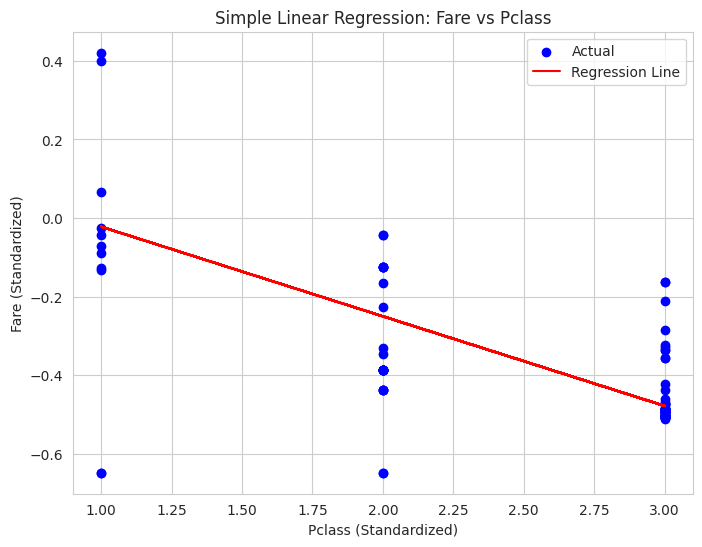

Simple Linear Regression Coefficients:
Intercept: 0.2060
Coefficient for Pclass: -0.2282


In [4]:
# Prepare data for simple linear regression
X_simple = df[['Pclass']]
y = df['Fare']

# Split data into train-test sets
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Fit simple linear regression model
simple_lr = LinearRegression()
simple_lr.fit(X_train_simple, y_train)

# Predictions
y_pred_simple = simple_lr.predict(X_test_simple)

# Evaluate model
mae_simple = mean_absolute_error(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print('Simple Linear Regression Metrics:')
print(f'MAE: {mae_simple:.4f}')
print(f'MSE: {mse_simple:.4f}')
print(f'R²: {r2_simple:.4f}')

# Plot regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test_simple, y_test, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', label='Regression Line')
plt.xlabel('Pclass (Standardized)')
plt.ylabel('Fare (Standardized)')
plt.title('Simple Linear Regression: Fare vs Pclass')
plt.legend()
plt.savefig('simple_regression_line.png')
plt.show()

# Interpret coefficients
print('Simple Linear Regression Coefficients:')
print(f'Intercept: {simple_lr.intercept_:.4f}')
print(f'Coefficient for Pclass: {simple_lr.coef_[0]:.4f}')

In [5]:
# Prepare data for multiple linear regression
X_multiple = df.drop('Fare', axis=1)
y = df['Fare']

# Split data into train-test sets
X_train_multiple, X_test_multiple, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Fit multiple linear regression model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train_multiple, y_train)

# Predictions
y_pred_multiple = multiple_lr.predict(X_test_multiple)

# Evaluate model
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print('Multiple Linear Regression Metrics:')
print(f'MAE: {mae_multiple:.4f}')
print(f'MSE: {mse_multiple:.4f}')
print(f'R²: {r2_multiple:.4f}')

# Interpret coefficients
print('\nMultiple Linear Regression Coefficients:')
for feature, coef in zip(X_multiple.columns, multiple_lr.coef_):
    print(f'{feature}: {coef:.4f}')
print(f'Intercept: {multiple_lr.intercept_:.4f}')

Multiple Linear Regression Metrics:
MAE: 0.0682
MSE: 0.0157
R²: 0.5392

Multiple Linear Regression Coefficients:
Pclass: -0.2286
Sex: 0.0095
Age: -0.0051
SibSp: 0.1681
Parch: 0.0000
Embarked_C: 0.0034
Embarked_Q: 0.0074
Embarked_S: -0.0108
Intercept: 0.2584
